<a href="https://colab.research.google.com/github/TasneemBadry/TasneemBadry/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Unsupervised Learning (Advanced Clustering)

For this lab we will use Scikit-Learn’s API, sklearn.datasets, which allows us to access a famous dataset for linguistic analysis, the 20newsgroups dataset. A newsgroup is an online user discussion group, such as a forum. Sklearn allows us to access different categories of content. We will use texts that have to do with technology, religion and sport.

More details about the dataset: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

Your task is to perform clustering on the given dataset.

**Submission: submit via onq.**


In [ ]:
# Import needed libraries. E.g., pandas, sklearn, nltk, etc.
import re
import sklearn
import pandas as pd
import numpy as np
import holoviews as hv
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bokeh.io import output_notebook
output_notebook()

from pathlib import Path

# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

Task 1: Read the dataset and report the basic statistics of the dataset
import data from sklearn.datasets and selecte pre-defined categories:

from sklearn.datasets import fetch_20newsgroups

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'alt.atheism',
]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))


In [ ]:
# TODO code for task 1
from sklearn.datasets import fetch_20newsgroups
categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'rec.sport.baseball', 'rec.sport.hockey', 'alt.atheism', ]
dataset = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, remove=('headers', 'footers', 'quotes'))

In [ ]:
dataset

{'DESCR': '.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total 

In [ ]:
dat=dataset.data
dat1=pd.DataFrame(dat)

Task 2: Data cleaning.
Use standard text preprocessing steps to preprocess raw textual content.
A sample preprocessing function is provided as below.

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing links
    - removing special characters
    - removing numbers
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove links
    text = re.sub(r"http\S+", "", text)
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", text)
    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
# TODO code for task 2
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text: str, remove_stopwords=True):
  """This utility function sanitizes a string by: - removing links - removing special characters - removing numbers - removing stopwords - transforming in lowercase - removing excessive whitespaces Args: text (str): the input text you want to clean remove_stopwords (bool): whether or not to remove stopwords Returns: str: the cleaned text """
  text = re.sub(r"http\S+", "", text)
# remove special chars and numbers
  text = re.sub("[^A-Za-z]+", " ", text)
# remove stopwords
  if remove_stopwords:
    # 1. tokenize
      tokens = nltk.word_tokenize(text)
    # 2. check if stopword
      tokens = [w for w in tokens if not w.lower() in stopwords.words("english")]
    # 3. join back together
      text = " ".join(tokens)
# return text in lower case and stripped of whitespaces
  text = text.lower().strip()
  return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dat1["text_clean"]= dat1.iloc[:,0].apply(preprocess_text)

In [ ]:
dat1

,0,text_clean
0,"I just moved from Borland C++ 3.0 to Visual C++ today. When I tried\nto compile my C++ program, ...",moved borland c visual c today tried compile c program complained function prototype problem tur...
1,"\n: \tNice cop out bill.\n\nI'm sure you're right, but I have no idea to what you refer. Would y...",nice cop bill sure right idea refer would mind explaining copped
2,I'm attempting to transfer files from my home computer running\nWindows 3.1 Terminal to a workst...,attempting transfer files home computer running windows terminal workstation school file transfe...
3,"\nThen not murdering would have no moral significance, since there\nwould be nothing voluntary a...",murdering would moral significance since would nothing voluntary starting get point mimicry nece...
4,\nI could give much the same testimonial about my experience as a scout\nback in the 1960s. The ...,could give much testimonial experience scout back issue gays principles thanks well put testimon...
...,...,...
2847,":P>My atheism is incidental, and the question of ""God"" is trivial.\n:P\n:P>But........\n:P\n:P>I...",p atheism incidental question god trivial p p p p matters great deal idiots try force belief p t...
2848,"\nSo that still leaves the door totally open for Khomeini, Hussein\net rest. They could still be...",still leaves door totally open khomeini hussein et rest could still considered true muslims judg...
2849,"\n Markus had a good season in MoDo in the Swedish elite league, scoring\n 22 goals, 17 assists,...",markus good season modo swedish elite league scoring goals assists points pim games daryl points...
2850,\n\n Opps! typed in the phone numbers wrong. Here are the correct numbers.\n\n\n\n ...,opps typed phone numbers wrong correct numbers


Task 3: create vector representation of each document using TF-IDF encoding, if we don't know what is TF-IDF encoding, read this: https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/03-TF-IDF-Scikit-Learn.html

In [ ]:
# TODO code for task 3, hint, you can use TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path
import glob
tfidf_vectorizer = TfidfVectorizer(input='text_clean', stop_words='english')


In [ ]:
tfidf_vector = tfidf_vectorizer.fit_transform(dat1['text_clean'])


In [ ]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(),  columns=tfidf_vectorizer.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tfidf_df.shape

(2852, 34061)

In [ ]:
tfidf_df.stack().reset_index()


,level_0,level_1,0
0,0,aa,0.0
1,0,aaa,0.0
2,0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,0.0
3,0,aaf,0.0
4,0,aah,0.0
...,...,...,...
97141967,2851,zzum,0.0
97141968,2851,zzy,0.0
97141969,2851,zzzoh,0.0
97141970,2851,zzzzzz,0.0


Task 4: Apply Kmeans and Kmeans++ on the above extracted document vectors. Brifely describe how would you select the value of k.
You can use https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

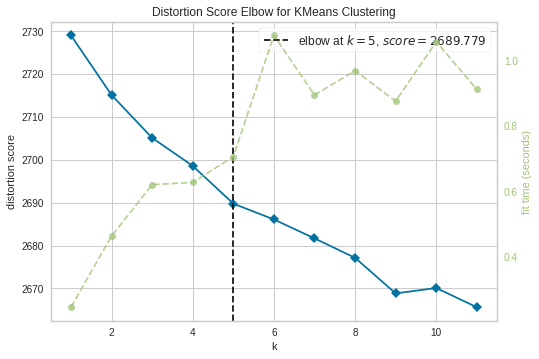

In [ ]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(tfidf_vector)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=0).fit(tfidf_vector)
kmeans_res=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

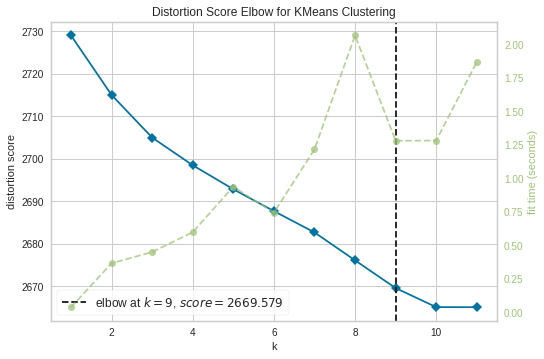

In [ ]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='random')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(tfidf_vector)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=9, init='random', random_state=0).fit(tfidf_vector)
kmeans2_res=kmeans.labels_

Task 5: perform tricks on the above two approaches by considering the high-dimensional nature of the dataset, you can consider PCA (from sklearn.decomposition import PCA), or other methods.

In [ ]:
# TODO for Task 5
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd1=svd.fit_transform(tfidf_vector)


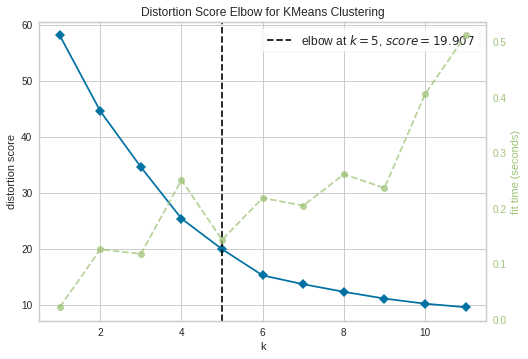

In [ ]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(svd1)
visualizer.show()

In [ ]:
kmeans_svd = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(svd1)
kmeans_res_svd=kmeans_svd.labels_

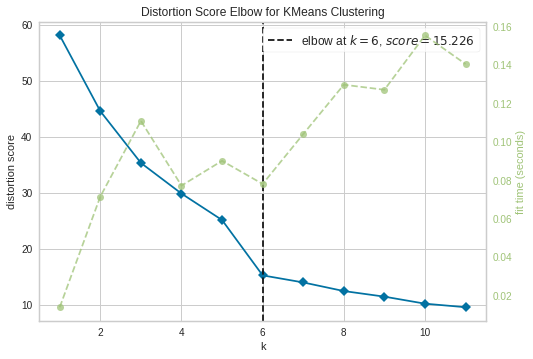

In [ ]:
# TODO code for Task 4. Note, you just need to change init parameter to swtich between random intilization and k-means++ initialization.
#init{‘k-means++’, ‘random’}, callable or array-like of shape (n_clusters, n_features), default=’k-means++’
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='random')
visualizer = KElbowVisualizer(model, k=(1,12)).fit(svd1)
visualizer.show()

In [ ]:
kmeans2_svd = KMeans(n_clusters=6, init='random', random_state=0).fit(svd1)
kmeans2_res_svd=kmeans2_svd.labels_

Task 6: compare the performance of the above four approaches on the given dataset using mutual information based scores: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html

In [ ]:
# TODO for Task 6
from sklearn.metrics import mutual_info_score

# print('different:',mutual_info_score(dataset.target,kmeans))
print('Model before using TruncatedSVD: KMeans using k-means++: ', mutual_info_score(dataset.target, kmeans_res))
print('Model before using TruncatedSVD: KMeans using random: ', mutual_info_score(dataset.target, kmeans2_res))
print('Model after using TruncatedSVD: KMeans using k-means++: ', mutual_info_score(dataset.target, kmeans_res_svd))
print('Model after using TruncatedSVD: KMeans using random: ', mutual_info_score(dataset.target, kmeans2_res_svd))

Model before using TruncatedSVD: KMeans using k-means++:  0.5817637388360284
Model before using TruncatedSVD: KMeans using random:  0.6392894578535442
Model after using TruncatedSVD: KMeans using k-means++:  0.49812839306459966
Model after using TruncatedSVD: KMeans using random:  0.6063140982260931


observation:    
the accuracy of "Model before using TruncatedSVD: KMeans using random:" is the best.